In [120]:
import nltk
import datascience
import csv
from matplotlib import pyplot as plt
import numpy as np
from sentiment_analysis import classifier
from matplotlib import pyplot as plt

In [16]:
# classification function
def classify_candidates(candidate_name):
    posts = []
    with open(candidate_name +'.csv', 'r') as f:
        reader = csv.reader(f)
        for row in reader:
            if len(row) > 0:
                posts.append(row[0])

    classify = classifier()
    positive_count = 0
    negative_count = 0
    for i in posts:
        a = classify(i);
        if( a == '1'):
            positive_count += 1
        else:
            negative_count += 1
    return [positive_count, negative_count]

In [17]:
trump_positive, trump_negative = classify_candidates('Trump')

In [18]:
bernie_positive, bernie_negative = classify_candidates('Bernie')

In [46]:
#listify sentiments
bernie_pos_list = bernie_positive*[1]
bernie_neg_list = bernie_negative*[0]
bernie = bernie_neg_list + bernie_pos_list
trump_pos_list = trump_positive*[1]
trump_neg_list = trump_negative*[0]
trump = trump_neg_list + trump_pos_list

In [115]:
#take a random sample of 200 sentiment classifications
final_bernie = [np.random.choice(bernie) for i in range(200)]
final_trump = [np.random.choice(trump) for i in range(200)]
observed_value = sum(final_trump) - sum(final_bernie)
observed_value

24

In [99]:
# use as a statistic the difference between the positive tweets for candidate 1 and the and the positive tweets for 
# candidate 2
# in this case Trump - Sanders

17

(array([    5.,    11.,    50.,    49.,   270.,   590.,  1395.,   937.,
         2632.,  3247.,  3456.,  1565.,  2541.,  1676.,   932.,   240.,
          288.,    93.,    19.,     4.]),
 array([-36. , -32.5, -29. , -25.5, -22. , -18.5, -15. , -11.5,  -8. ,
         -4.5,  -1. ,   2.5,   6. ,   9.5,  13. ,  16.5,  20. ,  23.5,
         27. ,  30.5,  34. ]),
 <a list of 20 Patch objects>)

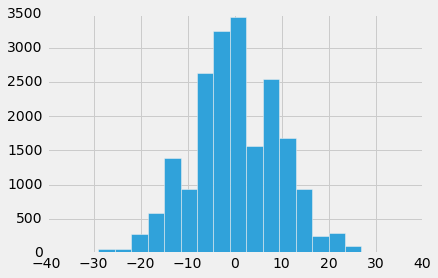

In [116]:
def permutations(candidate1, candidate2):
    table = Table(['candidates'])
    #candidate 1 is 0 to 199, candidate 2 is 200 to 400
    table['candidates'] = candidate1 + candidate2
    statistic = []
    for i in range(20000):
        table = table.sample()
        c1 = table['candidates'][:200]
        c2 = table['candidates'][200:]
        statistic.append(sum(c1) - sum(c2))
    return statistic
plt.hist(permutations(final_trump, final_bernie), bins = 20)

In [117]:
def p_value(distribution, observed_value):
    if observed_value < np.median(distribution):
        return np.sum(np.count_nonzero(np.array(distribution) <= observed_value))/len(distribution)
    else:
        return np.sum(np.count_nonzero(np.array(distribution) >= observed_value))/len(distribution)
p_value(permutations(final_trump, final_bernie), observed_value)

0.0058999999999999999